<a href="https://colab.research.google.com/github/profshai/Regression/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset

In [3]:
from google.colab import files
files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


{'Position_Salaries.csv': b'Position,Level,Salary\r\nBusiness Analyst,1,45000\r\nJunior Consultant,2,50000\r\nSenior Consultant,3,60000\r\nManager,4,80000\r\nCountry Manager,5,110000\r\nRegion Manager,6,150000\r\nPartner,7,200000\r\nSenior Partner,8,300000\r\nC-level,9,500000\r\nCEO,10,1000000'}

In [4]:
data = pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

### Feature Scaling

In [6]:
# Transform y into a 2D array as required by the StandardScaler()
y = y.reshape(len(y), 1)

### Feature scaling

This will transform the values to between -3 and 3.

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [10]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on whole dataset

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the result

I used the inverse_transform method to reverse the scale to the original scale.

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

### Visualising the result

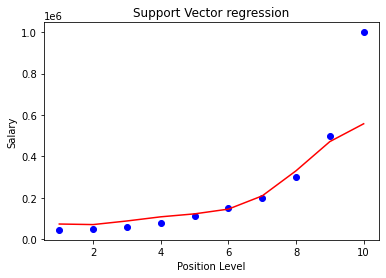

In [20]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)),  color = 'red')
plt.title('Support Vector regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the result with higher resolution and smoother curve

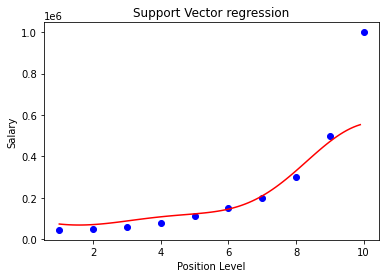

In [21]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))),  color = 'red')
plt.title('Support Vector regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()